In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

#here X_train and y_train contains images in the form of 2D-matrices

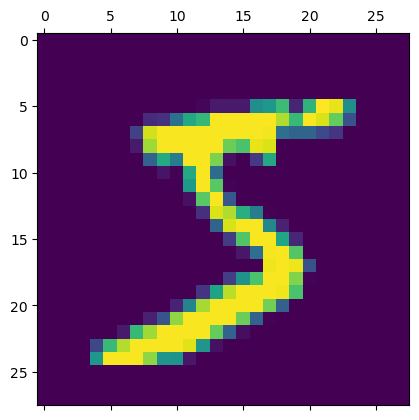

In [5]:
#we can visualise those matrices in the form of images in 2 forms ->

#1st way using matplotlib
plt.matshow(X_train[0])

#2nd way using opencv
cv.namedWindow("image",cv.WINDOW_NORMAL)
cv.resizeWindow("image",50,50)
cv.imshow("image",X_train[0])
cv.waitKey(0)
cv.destroyAllWindows()

In [7]:
#flattening the data so we will change its shape from (60000,28,28) to (60000,784)

#here images are present in the form of 2-D matrices
print(X_train.shape) 
print(X_test.shape)

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

#images are now present in the form 1-D matrices now
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [13]:
#used logistic regression here

import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

model_log=LogisticRegression()

#scaler for normalization of the data
scaler=MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train_flattened)
X_test_scaled=scaler.transform(X_test_flattened)

model_log.fit(X_train_scaled,y_train)

predicted_log =model_log.predict(X_test_scaled)

print("Accuracy Score : ",accuracy_score(y_test,predicted_log))
print("Confusion matrix: \n\n")
df=pd.DataFrame(confusion_matrix(y_test,predicted_log),index=["actual_0","1","2","3","4","5","6","7","8","9"],columns=["pred_0","1","2","3","4","5","6","7","8","9"])
print(df)

Accuracy Score :  0.9251
Confusion matrix: 


          pred_0     1    2    3    4    5    6    7    8    9
actual_0     959     0    0    3    1    7    5    4    1    0
1              0  1111    4    2    0    2    3    2   11    0
2              6     9  928   15    9    4   12    6   39    4
3              4     1   19  916    1   22    4   11   24    8
4              1     1    7    3  912    0   10    4   10   34
5             10     2    3   35    7  780   15    5   30    5
6              9     3    8    2    8   14  911    2    1    0
7              1     8   23    6    7    1    0  948    3   31
8              9    11    8   23    7   25   12    6  859   14
9              9     8    0   11   22    6    0   19    7  927


C:\Users\shalv\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
#using ANN here

model_ann = keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")])

model_ann.compile(
    optimizer = "adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# scaler=MinMaxScaler()
# X_train_flattened_scaled=scaler.fit_transform(X_train_flattened)

model_ann.fit(X_train_scaled,y_train,epochs=10)



C:\Users\shalv\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8788 - loss: 0.4658
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9154 - loss: 0.3033
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9210 - loss: 0.2833
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9238 - loss: 0.2727
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9258 - loss: 0.2658
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9276 - loss: 0.2620
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9289 - loss: 0.2582
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9291 - loss: 0.2555
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9295 - loss: 0.2529
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9310 - loss: 0.2509


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
5


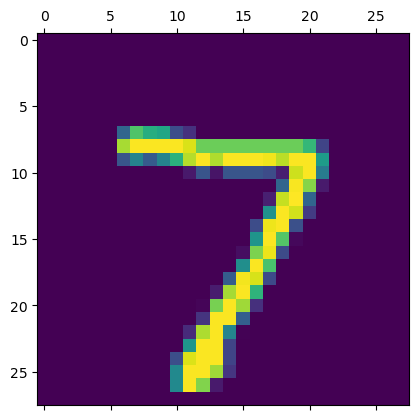

In [23]:
#prediction for a single value

predicted = model_ann.predict(scaler.transform([X_test_scaled[0]]))
#alternative of above statement -> predicted = model.predict(scaler.transform(X_test_flattened[0].reshape(1,-1)))
predicted_label = np.argmax(predicted)

print(predicted_label)
plt.matshow(X_test[0])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy score:  0.9276
tf.Tensor(
[[ 965    0    1    2    0    6    3    2    1    0]
 [   0 1115    3    2    0    1    4    2    8    0]
 [   8    8  923   14    9    4   12   11   40    3]
 [   5    0   19  912    0   29    2   11   26    6]
 [   1    1    2    2  922    0   12    5    9   28]
 [  10    3    1   26   10  784   15    9   30    4]
 [  14    3    9    1    7   11  910    1    2    0]
 [   1    6   23    2    6    1    0  959    4   26]
 [   8   11    6   17    9   26    9   12  869    7]
 [  11    7    1    8   24    8    0   26    7  917]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Actual')

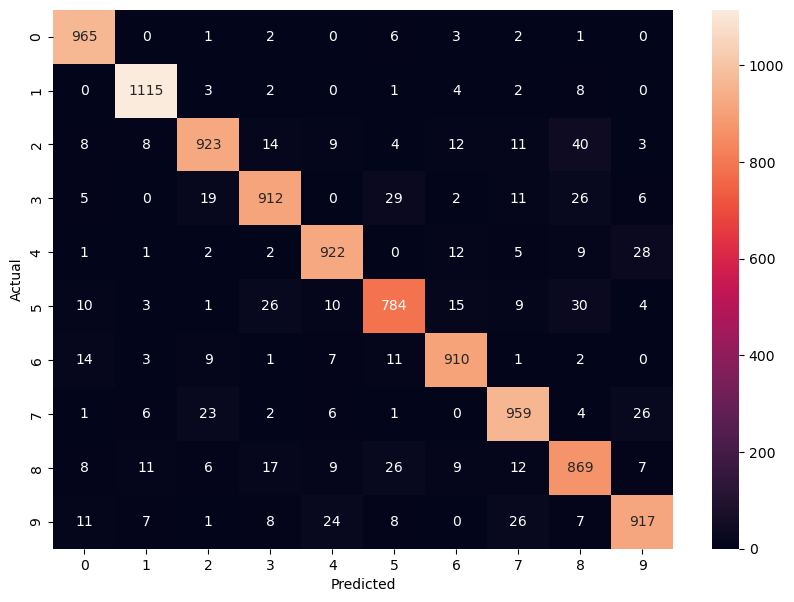

In [25]:
import seaborn as sn

#doing prediction for the entire x_test and calculating accuracy score
predicteds = model_ann.predict(X_test_scaled)
predicted_labels = [np.argmax(i) for i in predicteds]

print("Accuracy score: ",accuracy_score(y_test,predicted_labels))
#another way of printing confusion matrix
matrix = tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)
print(matrix)


plt.figure(figsize=(10,7))
sn.heatmap(matrix,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [27]:
#Adding 10 hidden layers in our neural network now 

model_ann_2 = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model_ann_2.compile(
    optimizer = "adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model_ann_2.fit(X_train_scaled,y_train,epochs=10)

C:\Users\shalv\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8620 - loss: 0.4887
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9169 - loss: 0.2902
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9243 - loss: 0.2667
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9285 - loss: 0.2521
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9318 - loss: 0.2420
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9338 - loss: 0.2339
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9351 - loss: 0.2288
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9370 - loss: 0.2226
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9374 - loss: 0.2185
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9385 - loss: 0.2138


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy score:  0.9323
tf.Tensor(
[[ 960    0    1    1    1    3    6    4    3    1]
 [   0 1107    4    2    1    2    3    2   14    0]
 [   7    8  946    6    8    2   15   11   27    2]
 [   1    0   17  936    0   15    1   11   24    5]
 [   2    1    7    0  897    0    9    3    6   57]
 [   8    1    4   42    5  774   15    5   29    9]
 [  12    3    6    0    8   14  904    0   11    0]
 [   2    8   12   10    6    0    0  956    3   31]
 [   5    4    4   21   10   11    6   11  888   14]
 [   8    5    2    7   13    2    0   10    7  955]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Actual')

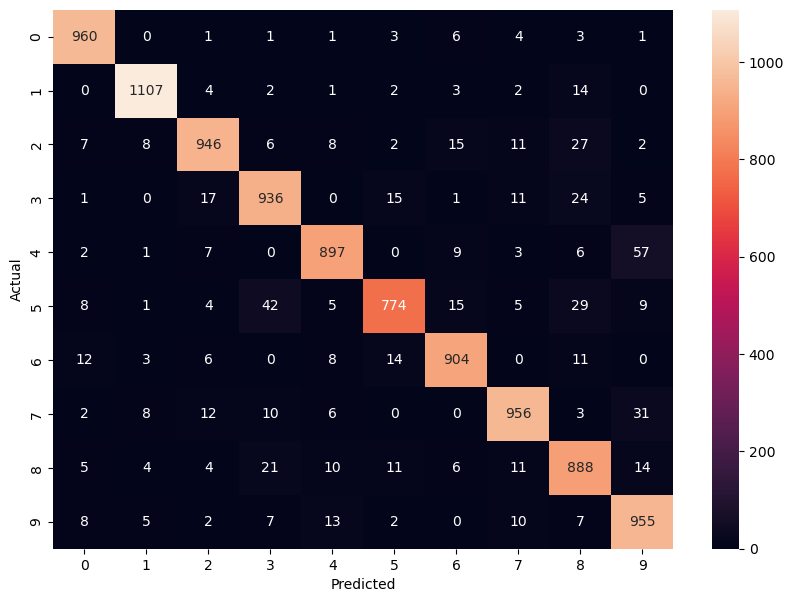

In [29]:
#checking accuracy score of model with 10 hidden layers

#doing prediction for the entire x_test and calculating accuracy score
predicteds = model_ann_2.predict(X_test_scaled)
predicted_labels = [np.argmax(i) for i in predicteds]

print("Accuracy score: ",accuracy_score(y_test,predicted_labels))
#another way of printing confusion matrix
matrix = tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)
print(matrix)


plt.figure(figsize=(10,7))
sn.heatmap(matrix,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [31]:
#Adding 100 hidden layers in our neural network now 
model_ann_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),# yahin pr humara data flatten ho jayega
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model_ann_3.compile(
    optimizer = "adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

#now since hum model ke andar hi flatten kr rhe hain toh ab hume flattened data dene ki zarurat nhi hai, so now our data is 3-D and 3-D data ko mein 
#scale nhi kr skti using standardscaler and minmaxscaler toh hum directly values ko 255.0 se divide krke scale kr denge.
X_train_scaledn = X_train/255.0

model_ann_3.fit(X_train_scaledn,y_train,epochs=10)

C:\Users\shalv\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\shalv\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9232 - loss: 0.2708
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9642 - loss: 0.1216
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9741 - loss: 0.0876
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9798 - loss: 0.0668
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9841 - loss: 0.0529
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9869 - loss: 0.0428
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9890 - loss: 0.0353
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9909 - loss: 0.0288
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9930 - loss: 0.0230
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9938 - loss: 0.0204


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy score:  0.9786
tf.Tensor(
[[ 971    0    0    0    1    1    2    1    2    2]
 [   1 1120    3    4    1    0    4    0    2    0]
 [   2    2 1007    4    2    0    2    3   10    0]
 [   0    0    5  985    0    4    1    5    0   10]
 [   2    0    2    1  966    0    3    2    1    5]
 [   1    1    0    4    1  876    3    2    2    2]
 [   5    1    2    0    2    5  941    0    2    0]
 [   1    4    8    0    2    1    0  997    1   14]
 [   6    0    3    7    6    5    1    4  933    9]
 [   1    2    0    1   12    1    0    2    0  990]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Actual')

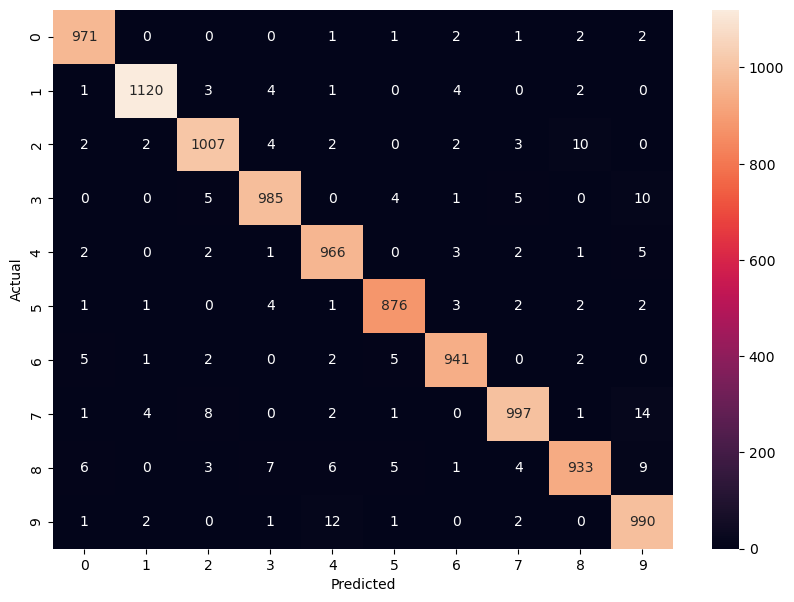

In [33]:
#checking accuracy score of model with 100 hidden layers

#doing prediction for the entire x_test and calculating accuracy score
predicteds = model_ann_3.predict(X_test/255.0)
predicted_labels = [np.argmax(i) for i in predicteds]

print("Accuracy score: ",accuracy_score(y_test,predicted_labels))
#another way of printing confusion matrix
matrix = tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)
print(matrix)


plt.figure(figsize=(10,7))
sn.heatmap(matrix,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
3


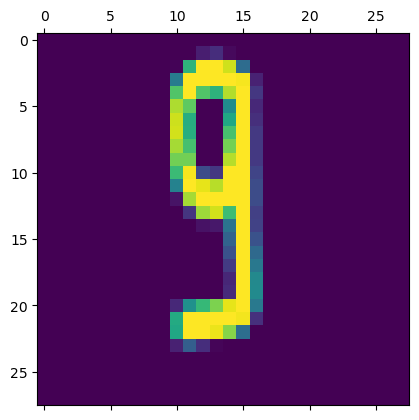

In [35]:
#final testing of a image from MS paint

#reading grayscaled image directly
image = cv.imread("test_9.png",cv.IMREAD_GRAYSCALE)

#reducing its size to 28 * 28 pixel
resized_image = cv.resize(image,(28,28),interpolation=cv.INTER_AREA)

#image has white background and number written with black ink but we have trained our model using images with black background and number written with white ink so we need to change our image accordingly.
inverted_image = cv.bitwise_not(resized_image)

#visualising our final image
plt.matshow(inverted_image)

#scaling the matrix for testing now
scaled_image=inverted_image/255.0

#predicting the image
predicted_image = model_ann_3.predict(scaled_image.reshape(1,28,28))
final_predicted = np.argmax(predicted_image)
print(final_predicted)

In [37]:
#implementing the project using cnn now

#will do scaling of the data first
X_train_scaledn = X_train/255.
X_test_scaledn = X_test/255.0

#reshape data for cnnn, since cnn expects colourful images thus the dimension of the image should be (height,width,channels) but here since the image is black and white so we have only 1 channel so we will change our image from (28, 28) to (28, 28, 1)
X_train_cnn = X_train_scaledn.reshape(-1, 28, 28, 1)
X_test_cnn = X_test_scaledn.reshape(-1, 28, 28, 1)

#making of the model
cnn_model = keras.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size =(3,3), activation="relu", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters = 64, kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn_model.fit(X_train_cnn, y_train, epochs=5)

C:\Users\shalv\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - accuracy: 0.9586 - loss: 0.1385
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9847 - loss: 0.0471
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9894 - loss: 0.0324
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9920 - loss: 0.0248
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9948 - loss: 0.0173


In [39]:
#predictions of the model
predicted = cnn_model.predict(X_test_cnn)
predicted_labels = [np.argmax(i) for i in predicted]

print(accuracy_score(y_test,predicted_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
0.9897


In [41]:
#final testing of a image from MS paint

#reading grayscaled image directly
image = cv.imread("test_3.png",cv.IMREAD_GRAYSCALE)

resized_image = cv.resize(image,(28,28),interpolation=cv.INTER_AREA)

#image has white background and number written with black ink but we have trained our model using images with black background and number written with white ink so we need to change our image accordingly.
inverted_image = cv.bitwise_not(resized_image)

#scaling the matrix for testing now
scaled_image=inverted_image/255.0

#predicting the image
predicted_image = cnn_model.predict(scaled_image.reshape(1,28,28,1))
final_predicted = np.argmax(predicted_image)
print(final_predicted)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
3


In [43]:
#saving the models

import joblib

# 1. Save Logistic Regression
# Note: We are saving the model, not the scaler, because dividing by 255 in the app is sufficient.
joblib.dump(model_log, 'model_logistic.pkl')
print("Logistic Regression saved as 'model_logistic.pkl'")

# 2. Save your BEST ANN (model_ann_3)
# We choose model_ann_3 because it had 97.6% accuracy vs model_ann's 92%
model_ann.save('model_ann.h5')
print("ANN saved as 'model_ann.h5'")

model_ann_2.save('model_ann2.h5')
print("ANN saved as 'model_ann2.h5'")

model_ann_3.save('model_ann3.h5')
print("ANN saved as 'model_ann3.h5'")

# 3. Save CNN
cnn_model.save('model_cnn.h5')
print("CNN saved as 'model_cnn.h5'")

Logistic Regression saved as 'model_logistic.pkl'
ANN saved as 'model_ann.h5'
ANN saved as 'model_ann2.h5'
ANN saved as 'model_ann3.h5'
CNN saved as 'model_cnn.h5'


Loading model...


Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
The model predicts this is a: 7


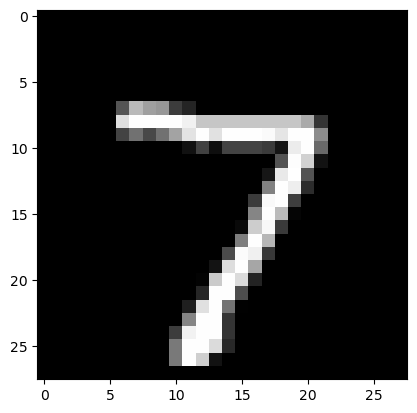

In [5]:
#testing by importing loaded model

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the saved model
print("Loading model...")
loaded_model = tf.keras.models.load_model('model_cnn.h5')
print("Model loaded successfully!")

# 2. Pick a random image from your test data to check
# (Make sure X_test is still defined in your notebook)
image_index = 0 # You can change this number
test_image = X_test[image_index] 

# 3. Preprocess it exactly like you did before training
# Scale to 0-1 and reshape to (1, 28, 28, 1)
processed_image = (test_image / 255.0).reshape(1, 28, 28, 1)

# 4. Ask the loaded model to predict
prediction = loaded_model.predict(processed_image)
predicted_digit = np.argmax(prediction)

# 5. Show results
print(f"The model predicts this is a: {predicted_digit}")
plt.imshow(test_image, cmap='gray')
plt.show()